# **Intrudução**


Este arquivo "notebook" é uma série de **códigos passo a passo**, a fim de utilizar as ferramentas do **MobileSAM** sobre **uma ou mais imagens que o usuário (você) poderá inserir**.

O objetivo é o oferecer de forma **simples e direta**, um resultado de segmentação semântica **sem que o usuário (você) precise ter conhecimentos prévios** sobre a utilização da ferramente (MobileSAM).

Caso nunca tenha utilizado um "notebook", basta ler os textos apresentados, se necessário executar alguma ação como "inserir imagens" e executar o código descrito.

Para mais informações sobre o modelo e a sua utilização, acesse o [repositório oficial do MobileSAM](https://github.com/ChaoningZhang/MobileSAM).

# **1. Configurando Ambiente e instalando dependências**

**1.1. Instalar a biblioteca do MobileSAM**

Apenas execute o código.

In [ ]:
pip install git+https://github.com/ChaoningZhang/MobileSAM.git

  Cloning https://github.com/ChaoningZhang/MobileSAM.git to /tmp/pip-req-build-8_ckzdhr
  Running command git clone --filter=blob:none --quiet https://github.com/ChaoningZhang/MobileSAM.git /tmp/pip-req-build-8_ckzdhr
  Resolved https://github.com/ChaoningZhang/MobileSAM.git to commit 34bbbfdface3c18e5221aa7de6032d7220c6c6a1
  Preparing metadata (setup.py) ... done


**1.2. Importar o MobileSAM**

Apenas execute o código.

In [ ]:
from mobile_sam import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor
import torch
import numpy as np

**1.4. Instalar dependências do colab**

Apenas execute o códigos.

In [ ]:
pip install matplotlib

In [ ]:
pip install opencv-python

**1.5. Importar dependências**

Apenas execute o código.

In [ ]:
from matplotlib import pyplot as plt
import cv2
import os

**1.6. Criar pasta do modelo pré-treinado**

Apenas execute o código.

In [ ]:
files = [f for f in os.listdir()]
there_is_weightsFolder = False

for file in files:
  if file == "weights":
    there_is_weightsFolder = True

if not there_is_weightsFolder:
  os.mkdir("weights")

**1.7. Instalar Modelo e o configurando**

É necessário instalar o modelo pré-treinado do MobileSAM em [Link Oficial](https://drive.google.com/file/d/1dE-YAG-1mFCBmao2rHDp0n-PP4eH7SjE/view). Extraia o arquivo e insira o modelo (mobile_sam.pt) na pasta "./weights"

Caso tenha inserido no local correto, o código seguinte deverá ser executado sem erros.

In [ ]:
# Set the model type
model_type = "vit_t"

# Set the model checkpoint path
file = [f for f in os.listdir("./weights")][0]
sam_checkpoint = f'./weights/{file}'

# Check if there is CUDA available
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load the model
mobile_sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
mobile_sam.to(device=device)
mobile_sam.eval()

# Set the predictor
predictor = SamPredictor(mobile_sam)

# **2. Insira imagens**

**2.1. Criar pasta "images"**

Apenas execute o código.

In [ ]:
files = [f for f in os.listdir()]
there_is_imagesFolder = False
there_is_resultsFolder = False

for file in files:
  if file == "results":
    there_is_resultsFolder = True
  if file == "images":
    there_is_imagesFolder = True

if not there_is_resultsFolder:
  os.mkdir("results")
if not there_is_imagesFolder:
  os.mkdir("images")

**2.2 Insira a sua imagem em "./images"**

Abra a aba do arquivos e encontre a pasta "images", entre e insirá a sua(s) imagem(s).

**Cheque se a sua imagem foi inserida no local correto, se foi, aparecerá aqui:**

Na sua pasta existe: ['.ipynb_checkpoints', 'img01.jpg']


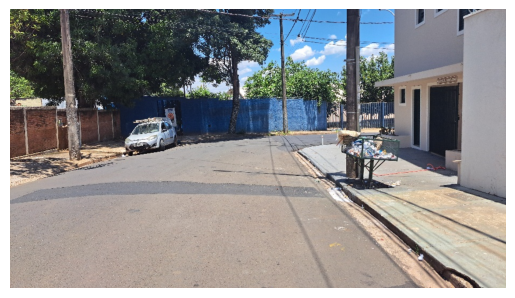

In [ ]:
# Captura e lista as imagens em content/images
files = [f for f in os.listdir(path="./images")]

print(f'Na sua pasta existe: {files}')

# Exibe a imagem
for file in files:
  if(file[0] != '.'):
    image = plt.imread(f'./images/{file}')
    plt.imshow(image)
    plt.axis('off')
    plt.show()



# **3. Segmentação Total**

Será exibida a imagem do resultado da segmentação total.

Obs. A segmentação total exige um tempo maior para ser processada. Portanto, tenha a espectativa de esperar vários minutos.

**3.1. Segmentação**

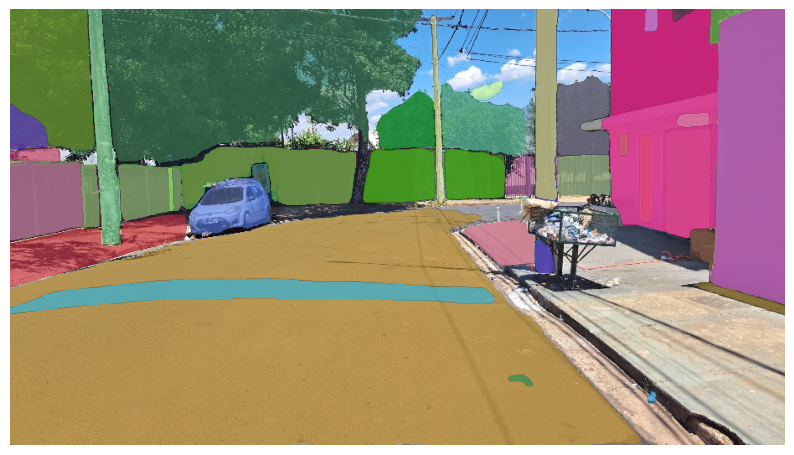

In [ ]:
def show_mask(mask, ax, random_color=True):

    # Set the color
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]

    # Create the mask image
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)

    # Display the mask image
    ax.imshow(mask_image)

# Define the display function
def show_points(coords, labels, ax, marker_size=375):

    # Display the points
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]

    # Display the points
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)

# Segmentation all images

files = [f for f in os.listdir(path="./images")]

for file in files:

  if(file[0] == '.'):
    continue

  # Load the image
  image = plt.imread(f'./images/{file}')

  mask_generator = SamAutomaticMaskGenerator(mobile_sam)
  masks = mask_generator.generate(image)

  # Display all masks
  plt.figure(figsize=(10, 10))
  plt.imshow(image)
  for mask in masks:
    show_mask(mask['segmentation'], plt.gca(), random_color=True)
  plt.axis('off')
  plt.show()


# **4. Segmentação por ponto**

Será exibida a imagem do resultado da segmentação a partir de um ponto.

**4.1. Definir ponto de origem da segmentação**

In [ ]:
# Predict the mask

input_point = np.array([[462, 450]])

**4.2. Segmentação**

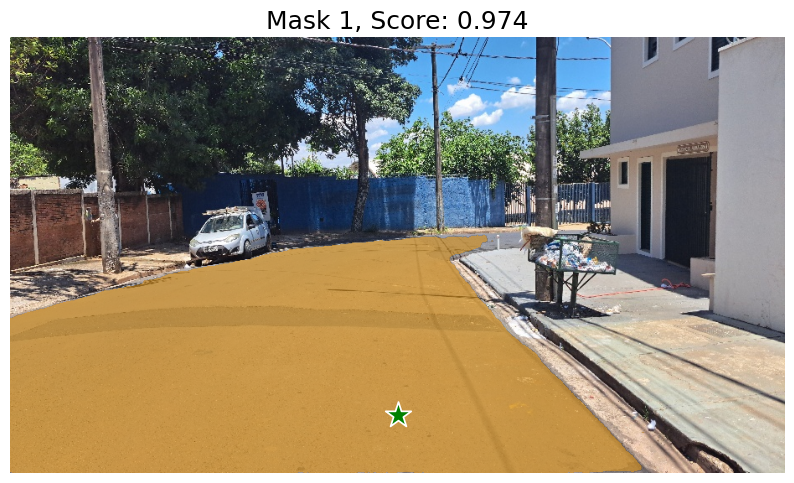

In [ ]:
def show_mask(mask, ax, random_color=True):

    # Set the color
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]

    # Create the mask image
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)

    # Display the mask image
    ax.imshow(mask_image)

# Define the display function
def show_points(coords, labels, ax, marker_size=375):

    # Display the points
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]

    # Display the points
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)

# Segmentation all images

files = [f for f in os.listdir(path="./images")]

for file in files:

  if(file[0] == '.'):
    continue

  # Load the image
  image = plt.imread(f'./images/{file}')

  # Set the image to be predicted
  predictor.set_image(image)

  masks, scores, logits = predictor.predict(
      point_coords=input_point,
      point_labels=input_label,
      multimask_output=False,
  )


  input_label = np.array([1])

  # Display the results
  for i, (mask, score) in enumerate(zip(masks, scores)):
      plt.figure(figsize=(10,10))
      plt.imshow(image)
      show_mask(mask, plt.gca())
      show_points(input_point, input_label, plt.gca())
      plt.title(f"Mask {i+1}, Score: {score:.3f}", fontsize=18)
      plt.axis('off')
      plt.show()
